# Chapter 02. 사이킷런으로 시작하는 머신러닝
## 01. 사이킷런 소개와 특징

In [1]:
import sklearn

print(sklearn.__version__)

0.23.2


## 02. 첫 번째 머신러닝 만들어 보기 - 붓꽃 품종 예측하기
지도학습 : 학습을 위한 다양한 피처와 분류 결정값인 레이블 데이터로 모델을 학습한 뒤, 별도의 테스트 데이터 세트에서 미지의 레이블을 예측한다.
    
    - 즉, 지도학습은 명확한 정답이 주어진 데이터를 먼저 한습 한 뒤 미지의 정답을 예측하는 방식이다.
    - 분류는 대표적인 지도학습 방법의 하나


- 사이킷런 패키지 내의 모듈명은 sklearn으로 시작하는 명명규칙이 있다.
- sklearn.datsets내의 모듈 : 사이킷런에서 자체적으로 제공하는 데이터 세트를 생성하는 모듈의 모임
- sklearn.tree 내의 모듈 : 트리 기반 ML 알고리즘을 구현한 클래스의 모임
- sklearn.model_selection : 학습 데이터와 검증 데이터, 예측 데이터로 데이터를 분리하거나 최적의 하이퍼 파라미터로 평가하기 위한 다양한 모듈의 모임
    - 하이퍼 파라미터 : 머신러닝 알고리즘 별로 최적의 학습을 위해 직접 입력하는 파라미터들을 통칭한다. 이를 통해 머신러닝 알고리즘의 성능을 튜닝할 수 있다.
    - train_test_split( ) 함수 : 데이터 세트를 학습 데이터와 테스트 데이터로 분리

In [5]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [11]:
import pandas as pd

# 붓꽃 데이터 세트 로딩
iris = load_iris()

#iris.data는 iris 데이터 세트에서 피처(feature)만으로 된 데이터를 numpy로 가지고 있다.
iris_data = iris.data

# iris.target은 붓꽃 데이터 세트에서 레이블(결정 값) 데이터를 numpyfh rkwlrh dlTek.
iris_label = iris.target
print('iris target값:', iris_label)
print('iris target명:', iris.target_names)

# 붓꽃 데이터 세트를 자세히 보기 위해 데이터프레임으로 변환
iris_df = pd.DataFrame(data = iris_data, columns = iris.feature_names)
iris_df['label'] = iris.target
iris_df.head(3)

iris target값: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
iris target명: ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


- 학습 데이터로 학습된 모델이 얼마나 뛰어난 성능을 가지는지 평가하려면 데스트 데이터 세트가 필요하다.
- train_test_split() : 학습 데이터와 테스트 데이터를 test_size 파라미터 입력 값의 비율로 쉽게 분할한다.
    - 첫 번째 파라미터 : 피처 데이터 세트
    - 두 번째 파라미터 : 레이블(lable)의 데이터 세트
    - test_size : 전체 데이터 세트 중 테스트 데이터 세트의 비율
    - random_state : 호출할 때마다 같은 학습/테스트 용 데이터 세트를 생성하기 위해 주어지는 난수 발생 값
        - (tran_test_split()는 호출 시 무작위로 데이터를 분리하므로 random_state를 지정하지 않으면 수행할 때마다 다른 학습/테스트 용 데이터를 만들 수 있다.)

In [14]:
# 테스트 데이터 20% 학습 데이터 80%로 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(iris_data, iris_label, test_size=0.2, random_state=11)

- 분류 알고리즘의 하나인 의사결정 트리 클래스 : DecisionTreeClassifier
-  DecisionTreeClassifier 객체의 fit( ) 메서드 : 학습용 피처 데이터 속성과 결정값 데이터 세트를 입력해 호출하면 학습을 수행한다.

In [16]:
# DecisionTreeClassifier 객체 생성
dt_clf =  DecisionTreeClassifier(random_state=11)

# 학습 수행
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

- 예측은 반드시 ! 학습데이터가 아닌 다른 데이터를 이용해야한다. 일반적으로 테스트 데이터 세트를 이용한다.
-  DecisionTreeClassifier 객체의 predict()메서드 : 테스트용 피처 데이터 세트를 입력해 호출하면 학습된 모델 기반에서 테스트 데이터 세트에 대한 예측값을 반환하게 된다.

In [17]:
# 학습이 완료된  DecisionTreeClassifier 객체에서 테스트 데이터 세트로 예측 수행
pred = dt_clf.predict(X_test)

- accuracy_score( ) 함수 : 사이킷런의 정확도 측정을 위함
    - 첫번째 파라미터 : 실제 레이블 데이터 세트
    - 두 번째 파라미터 : 예측 레이블 데이터 세트

In [19]:
from sklearn.metrics import accuracy_score
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9333


분류를 예측한 프로세스 정리
1. 데이터 세트 분리 : 데이터를 학습 데이터와 테스트 데이터로 분리
2. 모델 학습 : 학습 데이터를 기반으로 ML 알고리즘을 적용해 모델을 학습시킨다.
3. 예측 수행 : 학습된 ML 모델을 이용해 테스트 데이터의 분류(즉, 붓꽃 종류)를 예측한다.
3. 평가 : 이렇게 예측된 결괏값과 테스트 데이터의 실제 결괏값을비교해 ML 모델 성능을 평가한다.

## 03. 사이킷런의 기반 프레임워크 익히기
### Estimator 이해 및 fit( ), predict( ) 메서드
- 지도학습의 주요 두 축인 분류와 회귀의 다양한 알고리즘을 구현한 모든 사이킷런 클래스는 fit()과 predict()만을 이용해 간단하게 학습과 예측 결과를 반환한다.
- 사이킷런에서는 분류 알고리즘을 구현한 클래스를 Classifier로, 회귀 알고리즘을 구현한 클래스를 Regressor로 지칭힌다.
- 분류 알고리즘과 회귀 알고리즘을 합쳐서 Estimator클래스라고 부른다. 즉 지도학습의 모든 알고리즘을 구현한 클래스를 통칭해서 Esimator라고 부른다.(당현이 이 클래스도 fit()과 predict()를 내부에서 구현함)
- cross_val_score()와 같은 evaluation 함수, GridSearchCV와 같은 하이퍼 파라미터 튜닝을 지원하는 클래스의 경우 이 Estimator를 인자로 받는다. 인자로 받은 Estimator에 대해서 하이퍼 파라미터 튜닝을 지원하는 클래스 함수 내에서 이 Estimator의 fit과 predict를 호출해 평가를 하거나 하이퍼 파라미터 튜닝을 수행한다.

- 비지도 학습인 차원축소, 클러스터링, 피처 추출 등을 구현한 클래스 역시 대부분 fit( )과 transform( )을 적용한다.
- 비지도학습과 피처 추출에서 fit()은 지도학습과 같이 학습을 의미하는 것이 아니라, 입력 데이터의 형태에 맞춰 데이터를 변환하기 위한 사전구조를 맞추는 작업니다.
- fit으로 변환을 위한 사전 구조를 맞추면 이후 입력 데이터의 차원 변환, 클러스터링, 피처 추출 등의 실제 작업은 transform()으로 수행한다.
- fit_transform() : fit()과 transform()을 하나로 결합한것. 사용에 약간의 주의가 필요하다.

### 사이킷런의 주요 모듈
- 예제 데이터
    - sklearn.datasets : 사이킷런에 내장되어 예제로 제공하는 데이터 세트
    
    
- 피처 처리
    - sklearn.preprocessing : 데이터 전처리에 필요한 다양한 가공 기능 제공(문자열을 숫자형 코드 값으로 인코딩, 정규화, 스케일링 등)
    - sklearn.feture_selection : 알고리즘에 큰 영향을 미치는 피처를 우선순위대로 셀렉션 작업을 수행하는 다양한 기능 제공
    - sklearn.feature_extraction : 텍스트 데이터나 이미지 데이터의 벡터화된 피처를 추출(텍스트 데이터 피처 추출은 sklearn.feature_extraction.text 모듈에, 이미지 데이터의 피처 추출은 sklearn.feature_etraction.image 모듈에 지원 API가 있음)
    

- 피처 처리 & 차원 축소 
    - sklearn.decomposition : 차원 축소와 관련한 알고리즘 지원. PCA, NMF, Truncated SVD 등을 통해 차원 축소 기능 수행


- 데이터 분리, 검증 & 파라미터 튜닝
    - sklearn.model_selection : 교차 검증을 위한 학습용/테스트용 분리, 그리드 서치로 최적 파라미터 추출 등의 API 제공


- 평가 
    - sklearn.metrics : 분류, 회귀, 클러스터링, 페어와이즈에 대한 다양한 성능 측정 방법 제공.(Accuracy, Precision, Recat, ROC-AUC, RMSE 등 제공)
    
    
- ML 알고리즘
    - sklearn.ensemble : 앙상블 알고리즘 제공(랜덤 포레스트, 에이다 부스트, 그래디언트 부스팅 등)
    - sklearn.linear_model : 주로 선형회귀, 릿지, 라쏘 및 로지스틱 회귀 등 회귀 관련 알고리즘을 지원. 또한 SGD 관련 알고리즘도 제공
    - sklearn.naive_bayes : 나이브 베이즈 알고리즘 제공. 가우시안 NB, 다항 분포 NB 등
    - sklearn.neighbors : 최근접 이웃 알고리즘 제공. K-NN
    - sklearn.svm : 서포트 벡터 머신 알고리즘 제공
    - sklearn.tree : 의사 결정 알고리즘 제공
    - sklearn.cluster : 비지도 클러스터링 알고리즘 제공(K-평균, 계층형, DBSCAN등)


- 유틸리티
   - sklearn.pipeline : 피처 처리 등의 변환과 ML 알고리즘 학습, 예측 등을 함께 묶어서 실행할 수 있는 유틸리티 제공

### 내장된 예제 데이터 세트
- 사이킷런에 내장된 데이터 세트는 일반적으로 딕셔너리 형태로 되어있다.
- 개별 키가 가리키는 데이터 세트의 의미
    - data : 피처의 데이터 세트 (넘파이 배열 타입)
    - target : 분류시 레이블 값, 회귀일때는 숫자 결괏값 (넘파이 배열 타입)
    - target_names : 개별 레이블의 이름 (넘파이 배열 타입 또는 리스트타입)
    - feature_naems : 피처의 이름 (넘파이 배열 타입 또는 리스트타입)
    - DESCR : 데이터 세트에 대한 설명과 각 피처의 설명 (스트링타입)
- 피처의 데이터 값을 반환받기 위해서는 내장 데이터 세트 API를 호출한 뒤에 그 키값을 지정하면 된다.

In [20]:
from sklearn.datasets import load_iris

iris_data = load_iris()
print(type(iris_data))

<class 'sklearn.utils.Bunch'>


- bunch 클래스는 파이썬의 딕셔너리 자료형과 유사함

In [21]:
# 키 값 확인
keys = iris_data.keys()
print(keys)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [22]:
# load_iris()가 반환하는 객체의 키가 가리키는 값들
print('fearue_names의 type:', type(iris_data.feature_names))
print('fearue_names의 shape:', len(iris_data.feature_names))
print(iris_data.feature_names)

print('\n target_names의 type:', type(iris_data.target_names))
print('target_names의 shape:', len(iris_data.target_names))
print(iris_data.target_names)

print('\n data의 type:', type(iris_data.data))
print('data의 shape:', iris_data.data.shape)
print(iris_data['data'])

print('\n target의 type:', type(iris_data.target))
print('\n target의 shape:', iris_data.target.shape)
print(iris_data.target)

fearue_names의 type: <class 'list'>
fearue_names의 shape: 4
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

 target_names의 type: <class 'numpy.ndarray'>
target_names의 shape: 3
['setosa' 'versicolor' 'virginica']

 data의 type: <class 'numpy.ndarray'>
data의 shape: (150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

## 04. Model Selection 모듈 소개
### 학습/테스트 데이터 세트 분리 - train_test_split()

In [25]:
# 학습과 예측을 동일한 데이터 세트로 수행
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

iris = load_iris()
dt_clf = DecisionTreeClassifier()
train_data = iris.data
train_label = iris.target
dt_clf.fit(train_data, train_label)

# 학습 데이터 세트로 예측 수행
pred = dt_clf.predict(train_data)
print('예측 정확도:', accuracy_score(train_label, pred))

예측 정확도: 1.0


이미 학습한 학습 데이터 세트를 기반으로 예측했기 때문에 이런 결과가 나왔다. 따라서 예측을 수행하는 데이터 세트는 학습을 수행한 학습용 데이터 세트가 아닌 전용의 테스트 데이터 세트여야한다.

- sklearn.model_selection 모듈의 train_test_split
     - test_size : 전체 데이터에서 테스트 데이터 세트 크기를 얼마로 샘플링 할 것인가를 결정(디폴트는 0.25(25%)이다.)
     - train_size : 전체 데이터에서 학습용 데이터 세트 크기를 얼마로 샘플링 할 것인가(잘 사용X)
     - shuffle : 데이터를 분리하기 전에 데이터를 미리 섞을지 결정(디폴트 True) 데이터를 분산시켜서 좀 더 효율적인 학습 및 테스트 데이터 세트를 만드는데 사용
     - random_state : 호출할 때마다 동일한 학습/테스트용 데이터 세트 생성하기 위해 주어지는 난수값
     - train_test_split() 의 반환 값은 튜플 형태이다. 순차적으로 학습용 데이터의 피처 데이터 세트, 테스트용 데이터의 피처데이터 세트, 학습용 데이터의 레이블 데이터세트, 테스트용 데이터의 레이블 데이터 세트가 반환된다.

In [26]:
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier()
iris_data = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.3, random_state=121)

In [29]:
dt_clf.fit(X_train, y_train)
pred = dt_clf.predict(X_test)
print('예측 정확도: {0:.4f}'.format(accuracy_score(y_test, pred)))

예측 정확도: 0.9556


### 교차 검증
- 과적합 : 모델이 학습 데이터에만 과도하게 최적화되어 실제 예측을 다른 데이터로 수행할 경우에는 예측 성능이 과도하게 떨어지는 것.
- ML은 데이터에 기반한다. 그리고 데이터는 이상치, 분포도, 다양한 속성값, 피처 중요도 등 여러가지 ml에 영향을 미치는 요소를 가지고 있다. 
    - 특정 ml알고리즘에서 최적으로 동작할 수 있도록 데이터를 선별해 학습하면 실제 데이터 양식과는 많은 차이가 있을 것이고 결국 성능 저하로 이어진다.
- 교차검증 : 이러한 데이터 편중을 막기 위해 별도의 여러 세트로 구성된 학습 데이터 세트와 검증 데이터 세트에서 학습과 평가를 수행하는 것. 그리고 각 세트에서 수행한 평가 결과에 따라 하잍퍼 파라미터 튜닝 등의 모델 최적화를 더욱 손쉬게 할 수 있다.
    - 대부분의 ml 모델의 성능 평가는 교차검증 기반으로, 1차 평가를 한 뒤에 최종적으로 테스트 데이터 세트에 적용해 평가하는 프로세스이다.
    - ml에 사용되는 데이터 세트를 세분화해서 학습, 검증, 테스트 데이터 세트로 나눌 수 있다.
    - 테스트 데이터 세트 외에 별도의 검증 데이터 세트를 둬서 최종 평가 이전에 학습된 모델을 다양하게 평가하는 데 사용한다.

#### K 폴드 교차 검증
: 가장 보편적으로 사용되는 교차 검증 기법이다. 먼저 K개의 데이터 폴드 세트를 만들어서 K번만큼 각 폴트 세트에 학습과 검증 평가를 반복적으로 수행하는 방법
- 데이터 세트와 검증 데이터 세트를 점진적으로 변경하면서 마지막 K번째까지 학습과 검증을 수행하는 것
- K개의 예측 평가를 구했으면 이를 평균해서 K폴드 평가 결과로 바녕ㅇ한다.

In [33]:
from sklearn.model_selection import KFold
import numpy as np

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156)

# 5개의 폴드 세트로 분리하는 KFold 객체와 폴드 세트별 정확도를 담을 리스트 객체 생성
kfold = KFold(n_splits=5)
cv_accuracy = []
print('붓꽃 데이터 세트 크기:', features.shape[0])

붓꽃 데이터 세트 크기: 150


- KFold 객체는 split()을 호출하면 학습용/검증용 데이터로 분할할 수 있는 인덱스를 반환한다.

In [37]:
n_iter = 0

# KFold 객체의 split()를 호출하면 폴드 별 학습용, 검증용 테스트의 로우 인덱스를 array로 반환
for train_index, test_index in kfold.split(features):
    # kfold.split()으로 반환된 인덱스를 이용해 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # 학습 미 예측
    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1
    # 반복시마다 정확도 측정 
    accuracy = np.round(accuracy_score(y_test, pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 개별 iteration별 정확도를 합하여 평균 정확도 계산 
print('\n## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :1.0, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#1 검증 세트 인덱스:[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]

#2 교차 검증 정확도 :0.9667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#2 검증 세트 인덱스:[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]

#3 교차 검증 정확도 :0.8667, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#3 검증 세트 인덱스:[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]

#4 교차 검증 정확도 :0.9333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#4 검증 세트 인덱스:[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]

#5 교차 검증 정확도 :0.7333, 학습 데이터 크기: 120, 검증 데이터 크기: 30
#5 검증 세트 인덱스:[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

## 평균 검증 정확도: 0.9


#### Stratified K 폴드
: 불균형한 분포도를 가진 레이블 데이터 집합을 위한 K 폴드 방식이다. 
- 불균형한 분포도를 가진 레이블 데이터 집합은 특정 레이블 값이 특이하게 많거나 매우 적어서 값의 분포가 한쪽으로 치우치는 것을 말한다.
- stratified K 폴드는 K폴드가 레이블 데이터 집합이 원본 데이터 집합의 레이블 분포를 학습 및 테스트 세트에 제대로 분배하지 못하는 경우의 문제를 해결해준다.
- 이를 위해 stratified K 폴드는 원본 데이터의 레이블 분포를 먼저 고려한 뒤, 이 분포와 동일하게 학습과 검증 데이터 세트를 분배한다.

In [38]:
import pandas as pd

iris = load_iris()

iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [39]:
kfold = KFold(n_splits=3)

# kfold.split(X)는 폴드 세트를 3번 반복할 때마다 달라지는 학습/테스트 용 데이터 로우 인덱스 번호 반환. 
n_iter =0
for train_index, test_index  in kfold.split(iris_df):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    50
1    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 0    50
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 2    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    50
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 1    50
0    50
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    50
Name: label, dtype: int64


- StratifiedKFold는 이처럼 KFold로 분할된 레이블 데이터 세트가 전체 레이블 값의 분포도를 반영하지 못하는 문제를 해결해준다.
- KFold와의 사용시의 큰 차이는 stratifiedkfold는 레이블 데이터 분포도에 따라 학습/검증 데이터를 나누기 때문에 split()메서드에 인자로 피처 데이터 세트뿐만 아니라 레이블 데이터 세트도 반드시 필요하다.

In [40]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=3)
n_iter=0

for train_index, test_index in skf.split(iris_df, iris_df['label']):
    n_iter += 1
    label_train= iris_df['label'].iloc[train_index]
    label_test= iris_df['label'].iloc[test_index]
    print('## 교차 검증: {0}'.format(n_iter))
    print('학습 레이블 데이터 분포:\n', label_train.value_counts())
    print('검증 레이블 데이터 분포:\n', label_test.value_counts())

## 교차 검증: 1
학습 레이블 데이터 분포:
 2    34
1    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 1    17
0    17
2    16
Name: label, dtype: int64
## 교차 검증: 2
학습 레이블 데이터 분포:
 1    34
2    33
0    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
0    17
1    16
Name: label, dtype: int64
## 교차 검증: 3
학습 레이블 데이터 분포:
 0    34
2    33
1    33
Name: label, dtype: int64
검증 레이블 데이터 분포:
 2    17
1    17
0    16
Name: label, dtype: int64


학습 레이블과 검증 레이블 데이터 값의 분포도가 동일하게 할당 됐음을 알 수 있다.

In [41]:
dt_clf = DecisionTreeClassifier(random_state=156)

skfold = StratifiedKFold(n_splits=3)
n_iter=0
cv_accuracy=[]

# StratifiedKFold의 split( ) 호출시 반드시 레이블 데이터 셋도 추가 입력 필요  
for train_index, test_index  in skfold.split(features, label):
    # split( )으로 반환된 인덱스를 이용하여 학습용, 검증용 테스트 데이터 추출
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    #학습 및 예측 
    dt_clf.fit(X_train , y_train)    
    pred = dt_clf.predict(X_test)

    # 반복 시 마다 정확도 측정 
    n_iter += 1
    accuracy = np.round(accuracy_score(y_test,pred), 4)
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]
    print('\n#{0} 교차 검증 정확도 :{1}, 학습 데이터 크기: {2}, 검증 데이터 크기: {3}'
          .format(n_iter, accuracy, train_size, test_size))
    print('#{0} 검증 세트 인덱스:{1}'.format(n_iter,test_index))
    cv_accuracy.append(accuracy)
    
# 교차 검증별 정확도 및 평균 정확도 계산 
print('\n## 교차 검증별 정확도:', np.round(cv_accuracy, 4))
print('## 평균 검증 정확도:', np.mean(cv_accuracy)) 


#1 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#1 검증 세트 인덱스:[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  50
  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66 100 101
 102 103 104 105 106 107 108 109 110 111 112 113 114 115]

#2 교차 검증 정확도 :0.94, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#2 검증 세트 인덱스:[ 17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  67
  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82 116 117 118
 119 120 121 122 123 124 125 126 127 128 129 130 131 132]

#3 교차 검증 정확도 :0.98, 학습 데이터 크기: 100, 검증 데이터 크기: 50
#3 검증 세트 인덱스:[ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  83  84
  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 133 134 135
 136 137 138 139 140 141 142 143 144 145 146 147 148 149]

## 교차 검증별 정확도: [0.98 0.94 0.98]
## 평균 검증 정확도: 0.9666666666666667


- 이렇게 stratified K 폴드의 경우 원본 데이터의 레이블 분포도 특성을 반영한 학습 및 검증 데이터 세트를 만들 수 있으므로 왜곡된 레이블 데이터 세트에서는 반드시 이를 이용해 교차 검증 해햐한다.
- 사실 일반적으로 분류에서의 교차검증은 K 폴드가 아니라 stratified K폴드로 분할돼야 한다. 
- 하지만 회귀에서는 지원되지 않는다(회귀의 결정값은 이산값 형태의 레이블이 아니라 연속된 숫자값이기 때문)

#### 교차 검증을 보다 간편하게 - cross_val_score()
: API 내부에서 Estimator를 학습(fit), 예측(predict), 평가(evaluation)시켜주므로 간단하게 교차 검증을 수행할 수 있다.
- 폴드세트를 설정하고 for 루프에서 반복으로 학습 및 테스트 데이터의 인덱스를 추출한 뒤 반복적으로 학습과 예측을 수행하고 예측성능을 반환하는 것을 한꺼번에 수행해준다 !
- 주요 파라미터
    - estimator : 사이킷런의 분류 알고리즘 클래스인 Classifier 또는 회귀 알고리즘 클래스인 Regressor을 의미한다.
    - X : 피처 데이터 세트
    - y : 레이블 데이터 세트
    - scoring : 예측 성능 평가 지표를 기술
    - cv : 교차 검증 폴드 수 
- 수행 후 반환 값은 cv로 지정된 횟수만큼 scoring파라미터로 지정된 평가 지표로 평가 결괏값을 배열로 반환한다. 일반적으로 이를 평균해 평가 수치로 사용한다.
- classifier가 입력되면 stratified K 폴드 방식으로 레이블 값의 분포에 따라 학습/테스트 세트를 분할한다.

In [42]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

# 성능 지표는 정확도, 교차 검증 세트는 3개
scores = cross_val_score(dt_clf, data, label, scoring='accuracy', cv = 3)
print('교차 검증별 정확도:', np.round(scores, 4))
print('평균 검증 정확도:', np.round(np.mean(scores), 4))

교차 검증별 정확도: [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


- 비슷한 API로 cross_validat( )가 있다. 
    - 여러개의 평가 지표를 반환할 수 있다. 
    - 학습 데이터에 대한 성능, 평가 지표와 수행 시간도 같이 제공한다.
    - 그러나 보통 cross_val_score() 하나로도 대부분의 경우 쉽게 사용한다.

### GridSearchCV - 교차 검증과 최적 하이퍼 파라미터 튜닝을 한번에
: Classifier나 Regressor와 같은 알고리즘에 사용되는 하이퍼 파라미터를순차적으로 입력하면서 편리하게 최적의 파라미터를 도출할 수 있는 방안을 제공한다.

In [43]:
grid_parameters = { 'max_depth':[1, 2, 3],
                  'min_samples_split':[2, 3]}

- GridSearchCV는 교차검증을 기반으로 이 하이퍼 파라미터의 최적값을 찾게 해준다. 즉, 데이터 세트는 교차 검증을 위한 학습/테스트 세트로 자동으로 분할한 뒤에 하이퍼 파라미터 그리드에 기술된 모든 파라미터를 순차적으로 적용해 최적의 파라미터를 찾을 수 있게 해준다.
    - !순차적으로 파라미터를 테스트하므로 수행시간이 상대적으로 오래 걸림
    - (grid_parameters는 6회에 걸쳐 하이퍼 파라미터를 변경하면서 교차 검증 데이터 세트에 수행 성능을 측정하는데 cv가 3회이면 3*6 = 18회의 학습/평가가 이루어진다.
- 주요 파라미터
    - estimator : classifier, regressor, pipeline이 사용될 수 있다.
    - prarm_grid : key + 리스트 값을 가지는 딕셔너리가 주어진다. estimator의 튜닝을 위해 파라미터명과 사용될 여러 파라미터 값을 지정
    - scoring : 예측 성능을 측정할 평가 방법 지정. 보통은 사이킷런의 성능 평가 지표를 지정하는 문자열로 지정하나 별도의 성능 평가 지표 함수도 지정할 수 있다.
    - cv : 교차검증을 위해 분할되는 학습/테스트 세트의 개수
    - refit : 디폴트 True로 설정시 가장 최적의 하이퍼 파라미터를 찾은 뒤 입력된 estimator 객체를 해당 하이퍼파라미터로 재학습시킨다.
        - 또, true로 설정하면 GridSearchCV가 최적 성능을 나타내는 하이퍼 파라미터로 Estimator를 학습해 best_estimator_로 저장한다.

In [47]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# 데이터를 로딩하고 학습데이터와 테스트 데이터 분리
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size = 0.2, random_state=121)
dtree = DecisionTreeClassifier()

- GridSearchCV 객체의 fit(학습데이터세트) 메서드를 수행하면, 학습 데이터를 cv에 기술된 폴딩 세트로 분할해 param_grid에 기술된 하이퍼 파라미터를 순차적으로 변경하면서 학습/평가를 수행하고 그 결과를 cv_results_속성에 기록한다.
    - cv_result는 gridsearchcv의 결과 세트로서 딕셔너리 형태로 key 값과 리스트 형태의 value 값을 가진다.
    - fit()를 수행하면 최고 성능을 나타낸 하이퍼 파라미터의 값과 그때의 평가 결과 값이 각각 best_params_, best_score_속성에 기록된다.

In [48]:
import pandas as pd

# param_grid의 하이퍼 파라미터를 3개의 train, test et fold로 나누어 테스트 수행 설정
### refit = Truerk default임. True이면 가장 좋은 파라미터 설정으로 재학습시킨다.
grid_dtree = GridSearchCV(dtree, param_grid = grid_parameters, cv=3, refit=True)

# 붓꽃 학습 데이터로 param_grid의 하이퍼 파라미터를 순차적으로 학습/평가
grid_dtree.fit(X_train, y_train)

# GridSearchCV 결과를 추출해 데이터 프레임으로 변환
scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
           'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'max_depth': 1, 'min_samples_split': 2}",0.700000,5,0.700,0.7,0.70
1,"{'max_depth': 1, 'min_samples_split': 3}",0.700000,5,0.700,0.7,0.70
2,"{'max_depth': 2, 'min_samples_split': 2}",0.958333,3,0.925,1.0,0.95
3,"{'max_depth': 2, 'min_samples_split': 3}",0.958333,3,0.925,1.0,0.95
4,"{'max_depth': 3, 'min_samples_split': 2}",0.975000,1,0.975,1.0,0.95
5,"{'max_depth': 3, 'min_samples_split': 3}",0.975000,1,0.975,1.0,0.95


주요 칼럼별 의미
- params : 수행할 때마다 적용된 개별 하이퍼 파라미터 값을 나타낸다.
- mean_test_score : 개별 하이퍼 파라미터별로 CV의 폴딩 테스트 세트에 대해 총 수행한 평가 평균값이다.
- rank_test_score : 하이퍼 파라미터별로 성능이 좋은 score순위를 나타낸다. 1이 가장 뛰어난 순위이며 이떄의 파라미터가 최적의 하이퍼 파라미터이다.
- split0_test_score, split1_test_score, split2_test_score : cv가 3인 경우, 즉 3개의 폴딩 세트에서 각각 테스트한 성능 수치

In [50]:
print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}' .format(grid_dtree.best_score_))

GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도:0.9750


In [52]:
# GridSearchCV의 refit으로 이미 학습된 최적 estimator 반환
estimator = grid_dtree.best_estimator_

# GridSearchCV의 best_estimator_는 이미 최적 학습이 됐으므로 별도 학습이 필요 없음
pred = estimator.predict(X_test)
print('테스트 데이터 세트 정확도:{0:.4f}'.format(accuracy_score(y_test,pred)))

테스트 데이터 세트 정확도:0.9667


## 05. 데이터 전처리
사이킷런의 ML 알고리즘을 적용하기 전에 데이터에 대해 미리 처리해야 할 기본사항
1. 결손값, 즉 NaN, Null값은 허용되지 않는다. 따라서 이러한 Null값은 고정된 다른 값으로 변환되어야 한다.
    - 피처값 중 널값이 얼마 되지 않는다면 피처의 평균값 등으로 간단히 대처할 수 있다.
    - 널이 대부분이라면 오히려 해당 피처는 드롭하는 것이 더 좋다.
2. 사이킷런의 머신러닝 알고리즘은 문자열 값을 입력값으로 허용하지 않는다. 그래서 모든 문자열 값은 인코딩돼서 숫자 형으로 변환해야 한다.
    - 카테고리형 피처 -> 코드 값으로 표현
    - 텍스트형 피처 -> 피처 벡터화 등의 기법으로 벡터화하거나 불필요한 피처라고 판단되면 삭제한다.

### 데이터 인코딩
#### 레이블 인코딩
: 카테고리 피처를 코드형 숫자 값으로 변환하는 것이다. 즉, 문자열 값을 숫자형 카테고리 값으로 변환한다.
- 주의점 : '01', '02' 같은 코드값 역시 문자열이므로 1, 2와 같은 숫자형값으로 변환돼야 한다.
- LabelEncoder 클래스로 구현하며, 이를 객체로 생성한 후 fit과 transform을 호출해 레이블 인코딩을 수행한다.
- 레이블 인코딩은 선형 회귀와 같은 ML 알고리즘에는 적용하지 않아야한다.
    -  숫자값으로 변환되면서 위와 같은 알고리즘에는 이를 적용하면 숫자 값의 경우 크고 작음에 대한 특성이 작용하여 예측 성능이 떨어지는 경우가 발생하기 때문이다.
    - 원핫 인코딩은 레이블 인코딩의 이러한 문제점을 해결한다.

In [54]:
from sklearn.preprocessing import LabelEncoder

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# LabelEncoder객체로 생성한 후 fit과 transform을 호출해 레이블 인코딩을 수행한다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 반환값:', labels)

인코딩 반환값: [0 1 4 5 3 3 2 2]


- classes_ 속성 : 문자열 값이 어떤 숫자 값으로 인코딩 됐는지 알 수 있다.
    - 0번부터 순서대로 변환된 인코딩 값에 대한 원본 값을 가지고 있다.

In [55]:
print(encoder.classes_)

['TV' '냉장고' '믹서' '선풍기' '전자레인지' '컴퓨터']


- inverse_transform()을 통해 인코딩된 값을 다시 디코딩할 수 있다.

In [56]:
print(encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

['전자레인지' '컴퓨터' '믹서' 'TV' '냉장고' '냉장고' '선풍기' '선풍기']


#### 원-핫 인코딩(One-Hot Encoding)
: 피처 값의 유형에 따라 새로운 피처를 추가해 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시하는 방식이다.
- 즉, 행 형태로 돼 있는 피처의 고유 값을 열 형태로 차원을 변환한 뒤, 고유 값에 해당하는 칼럼에만 1을 표시하고 나머지 칼럼에는 0을 표시한다.
    - 원-핫 : (여러개의 속성 중 단 한 개의 속성만 1로 표시)
- OneHotEncoder 클래스로 쉽게 변환이 가능하다.
- 주의점
    1. OneHotEncoder로 변환하기 전에 모든 문자열 값이 숫자형 값으로 변환돼야 한다.
    2. 입력 값으로 2차원 데이터가 필요하다

In [58]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV', '냉장고', '전자레인지', '컴퓨터', '선풍기', '선풍기', '믹서', '믹서']

# 먼저 숫자 값으로 변환을 위해 LabelEncoder로 변환한다.
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
# 2차원 데이터로 변환
labels = labels.reshape(-1, 1)

# 원핫 인코딩 적용
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print('원 핫 인코딩 데이터')
print(oh_labels.toarray()) # return an ndarray
print('\n원 핫 인코딩 데이터 차원')
print(oh_labels.shape)

원 핫 인코딩 데이터
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]

원 핫 인코딩 데이터 차원
(8, 6)


- get_dummies() : 원-핫 인코딩을 더 쉽게 지원하는 API. 문자열 카테고리 값을 숫자 형으로 변환할 필요 없이 바로 변환할 수 있다.

In [60]:
import pandas as pd

df = pd.DataFrame({'item':['전자레인지', '컴퓨터', '믹서', 'TV', '냉장고', '냉장고', '선풍기', '선풍기']})
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자레인지,item_컴퓨터
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,0,0,1,0,0,0
3,1,0,0,0,0,0
4,0,1,0,0,0,0
5,0,1,0,0,0,0
6,0,0,0,1,0,0
7,0,0,0,1,0,0


### 피처 스케일링과 정규화
피처 스케일링 : 서로 다른 변수의 값 범위를 일정한 수준으로 맞추는 작업. 대표적인 방법으로는 표준화와 정규화가 있다.
- 표준화 : 데이터의 피처 각각이 평균이 0이고 분산이 1인 가우시안 정규 분포를 가진 값으로 변환하는 것
    - 원래 값에서 피처 x의 평균을 뺀 값을 피처 x의 표준편차로 나눈 값으로 계산
- 정규화 : 서로 다른 피처의 크기를 통일하기 위해 크기를 변환해주는 개념. 변수를 모두 동일한 크기 단위로 비교하기 위해 값을 모두 최소 0 ~ 최대 1의 값으로 변환하는 것이다. 즉, 개별 데이터의 크기를 모두 똑같은 단위로 변경하는 것
    - 원래 값에서 피처 x의 최솟값을 뺸 값을 피처 x의 최댓값과 최솟값의 차이로 나눈값으로 변환

- 사이킷런 Nomalizer 모듈 : 선형대수에서의 정규화 개념이 적용됐으며, 개별 벡터의 크기를 맞추기 위해 변환하는 것. 즉, 개별 벡터를 모든 피처 벡터의 크기로 나눠준다.
    - 일반적인 정규화와는 차이가 있다.
    - 새로운 데이터는 원래 값에서 세개의 피처의 i번째 피처 값에 해당하는 크기를 합한 값으로 나눠준다.
- 혼선을 방지하기 위해 일반적인 의미의 표준화와 정규화를 피처 스케일링으로 통칭하고 선형대수 개념의 정규화를 벡터 정규화라 지칭한다.

### StandardScaler
: 표준화를 쉽게 지원하기 위한 클래스이다. 즉, 개별 피처를 평균이 0이고, 분산이 1인 값으로 반환해준다.
- 이렇게 가우시안 정규 분포를 가질 수 있도록 데이터를 변환하는 것은 몇몇 알고리즘에서 매우 중요하다.
- 특히 사이킷런에서 구현한 RBF 커널을 이용하는 서포트벡터머신이나 선형회귀, 로지스틱 회귀는 데이터가 가우시안 분포를 가지고 있다고 가정하고 구현됐기 때문에 사전에 표준화를 적용하는 것은 예측 성능 향상에 중요한 요소가 될 수 있다.

In [61]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 세트를 로딩하고 데이터프레임으로 변환
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균값\n', iris_df.mean())
print('\nfeature 들의 분산 값\n', iris_df.var())

feature 들의 평균값
 sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

feature 들의 분산 값
 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [62]:
from sklearn.preprocessing import StandardScaler

# standardScaler 객체 생성
scaler = StandardScaler()
# StandardScaler로 데이터 세트 변환. fit과 transform 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 numpy ndarray로 반환돼 이를 데이터프레임으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균값\n', iris_df_scaled.mean())
print('\nfeature 들의 분산 값\n', iris_df_scaled.var())

feature 들의 평균값
 sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64

feature 들의 분산 값
 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


### MinMaxScaler
: 데이터값을 0과 1사이의 범위 값으로 변환한다.(음수값이 있으면 -1에서 1값으로 변환한다). 데이터의 분포가 가우시안 분포가 아닐 경우에 min, max scale을 적용해볼 수 있다.

In [63]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()
# MinMaxScaler로 데이터 세트 변환. fit과 transform 호출
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 스케일 변환된 데이터 세트가 numpy ndarray로 반환돼 이를 데이터프레임으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 최솟값\n', iris_df_scaled.min())
print('\nfeature 들의 최댓값\n', iris_df_scaled.max())

feature 들의 최솟값
 sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64

feature 들의 최댓값
 sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


### 학습 데이터와 테스트 데이터의 스케일링 변환시 유의점
- fit( )은 데이터 변환을 위한 기준 정보 설정을 적용
- transform( )은 이렇게 설정된 정보를 이용해 데이터를 변환
- fit과 transform을 적용할때 주의점
    - 학습 데이터로 fit이 적용된 스케일링 기준 정보를 그대로 테스트 데이터에 적용해야한다.
    - 그렇지 않고 테스트 데이터로 다시 새로운 스케일링 기준 정보를 만들게 되면 학습데이터와 테스트 데이터의 스케일링 기준 정보가 서로 달라지기 때문에 올바른 예측 결과를 도출하지 못할 수 있다.

In [64]:
# 테스트 데이터에 fit을 적용할 때 문제 일어나는지 알아보기
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0부터 10까지, 테스트 데이터는 0부터 5까지 값을 가지는 데이터 세트로 생성
# scaler클래스의 fit, transform은 2차원 이상 데이터만 가능하므로 reshape로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array = np.arange(0, 6). reshape(-1, 1)

In [66]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0 ~ 1값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터 최솟값이 0, 최댓값이 10으로 설정
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10 -> 1로 변환됨
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [67]:
# MinMaxScaler에 test_array를 fit하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5 -> 1로 변환됨
test_scaled = scaler.transform(test_array)

print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.2 0.4 0.6 0.8 1. ]


학습 데이터와 테스트 데이터의 서로 다른 원본값이 동일한 값으로 변환되는 결과를 초래한다.
- 머신러닝 모델은 학습 데이터를 기반으로 학습되기 떄문에 반드시 테스트 데이터는 학습 데이터의 스케일링 기준에 따라야 한다. 

따라서 테스트 데이터에 다시 fit을 적용해서는 안되며 학습 데이터로 이미 fit이 적용된 scaler객체를 이용해 transform으로 변환해야한다.

In [69]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1),2))
print('scale된 train_array 데이터:', np.round(train_scaled.reshape(-1),2))

# test_array에 Scale 변환을 할 떄는 반드시 fit을 호출하지 않고 transform만으로 변환해야 함
test_scaled = scaler.transform(test_array)
print('원본 test_array 데이터:', np.round(test_array.reshape(-1),2))
print('scale된 test_array 데이터:', np.round(test_scaled.reshape(-1),2))

원본 train_array 데이터: [ 0  1  2  3  4  5  6  7  8  9 10]
scale된 train_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
원본 test_array 데이터: [0 1 2 3 4 5]
scale된 test_array 데이터: [0.  0.1 0.2 0.3 0.4 0.5]


- fit_transform( )을 적용할때도 마찬가지. fit_transform()은 fit과 transform을 순차적으로 수행하는 메소드이므로 학습데이터에서는 상관없지만 !!!! 테스트 데이터에서는 절대 사용해서는 안된다. !!!!
- 학습과 테스트 데이터 세트로 분리하기 전에 먼저 전체 데이터 세트에 스케일링을 적용한 뒤 학습과 테스트 데이터 세트로 분리하는 것이 더 바람직하다.
    - 이게 여의치 않다면 테스트 변환시에는 fit이나 fit_transform을 적용하지 않고 학습데이터로 이미 fit이 된 scaler객체를 이용해 transform으로 변환
- 이 유의 사항은 사이킷런 기반의 PCA 같은 차원축소변환이나 텍스트의 피처 벡터화 변환 작업시에도 동일하게 적용된다.

## 06. 사이킷런으로 수행하는 타이타닉 생존자 예측

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# 브라우저 내부(inline)에 바로 그려지도록 하는 코드
%matplotlib inline 

titanic_df = pd.read_csv('/Users/wizdom/Desktop/data_analysis/Kaggle_titanic/titanic/train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


- info( ) 메서드 : 로딩된 데이터 칼럼 타입 확인

In [20]:
print('\n ###학습 데이터 정보### \n')
print(titanic_df.info())


 ###학습 데이터 정보### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


RangeIndex를 통해 전체 로우 수를 알 수 있다. 891로우와 12개의 칼럼으로 구성되어 있음을 알 수 있다
- object 타입은 string 타입으로 봐도 무방하다.

- fillna( ) : 간단하게 Null 값을 다른 값으로 변경해준다.

In [21]:
# Age 열은 평균 나이, Cabin, Embarked는 'N'으로 채워준다.

titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 null 값 개수 :', titanic_df.isnull().sum().sum())

데이터 세트 null 값 개수 : 0


In [22]:
# 각 문자열 칼럼들의 값의 건수와 유형 확인

print('Sex 값 분포 :\n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 :
 N              687
C23 C25 C27      4
B96 B98          4
G6               4
C22 C26          3
              ... 
B82 B84          1
D49              1
F E69            1
C111             1
B41              1
Name: Cabin, Length: 148, dtype: int64

 Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [23]:
# Cabin의 선실 등급을 나타내는 첫번째 알파벳 추출

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [24]:
# 성별에 따른 생존자 수 비교

titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

여자 : 74.2% 생존, 남자 : 18.8% 생존. 따라서 여자가 더 생존률이 높다.

- seaborn 패키지를 이용하여 시각화하기
- barplot() : 가로 막대 차트

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

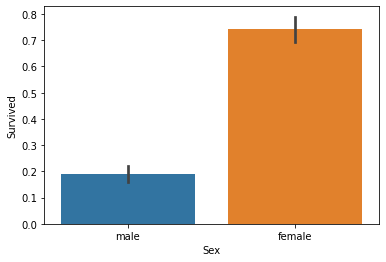

In [25]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

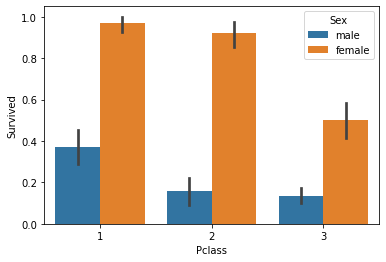

In [26]:
# 객실 등급별 성별에 따른 생존확률

sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

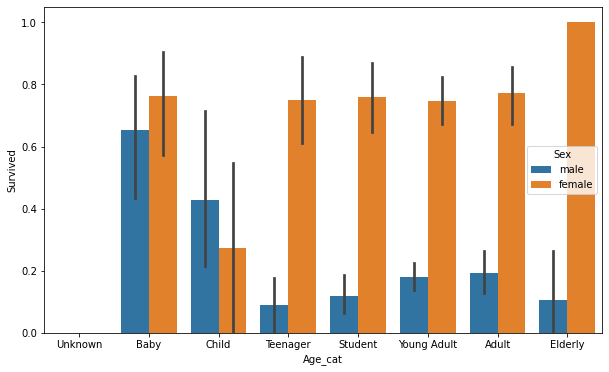

In [27]:
# Age에 따른 생존확률

# 입력 age에 따라 구분 값을 반환하는 함수 설정
def get_category(age):
    cat = ''
    if age <= -1: cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age <= 12: cat = 'Child'
    elif age <= 18: cat = 'Teenager'
    elif age <= 25: cat = 'Student'
    elif age <= 35: cat = 'Young Adult'
    elif age <= 60: cat = 'Adult'
    else : cat = 'Elderly'
    
    return cat

# 막대그래프의 크기 figure를 더 크게 설정
plt.figure(figsize=(10, 6))

# X축의 값을 순차적으로 표시하기 위한 설정
# 안하면 제멋대로 순서 나옴
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']

# lambda 식에 위에서 생성한 get_category()함수를 반환값으로 지정.
# get_category(x)는 입력값으로 'Age'칼럼 값을 받아서 해당하는 cat 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

baby와 여성 elderly의 경우는 생존 확률이 높은 것을 알 수 있다. 하지만 여자 child 경우는 다른 연령대에 비해 생존확률이 낮다.

In [28]:
# 레이블 인코딩 적용하기(문자열값 -> 숫자형 카테고리)
from sklearn import preprocessing

def encode_features(dataDF):
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features :
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
    
    return dataDF
    
titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3
